
# 🧭 Étape 1 — Probabilités & Statistiques (avec une pièce truquée)
**Objectif :** Comprendre le comportement du hasard et des distributions aléatoires, au service des simulations de Monte Carlo.

Ce notebook couvre :
- Concepts de base : événements, probabilités, indépendance  
- Variables aléatoires (discrètes & continues)  
- Espérance, variance, covariance  
- Lois fondamentales : uniforme, normale, exponentielle, binomiale  
- Loi des grands nombres (LLN) & Théorème central limite (CLT)  
- Exercices guidés

**Exemple fil rouge :** lancer d’une **pièce truquée** (pile avec probabilité `p ≠ 0.5`).


## ⚙️ Préparation de l'environnement


## 1) Concepts de base
- **Événement** : sous-ensemble des issues possibles (ex. {pile}).  
- **Probabilité** : mesure entre 0 et 1 assignée à un événement.  
- **Indépendance** : deux événements A et B sont indépendants si `P(A∩B)=P(A)P(B)`.  
- **Variable aléatoire (VA)** : fonction qui associe un nombre à chaque issue (ex. `X = 1` si pile, `0` sinon).



## 2) Variables aléatoires, espérance, variance, covariance
- **Espérance** `E[X]` : moyenne théorique (centre de gravité de la distribution).  
- **Variance** `Var(list_of_list_of_list_of_x)` : dispersion autour de l’espérance ; `Var(X)=E[X^2]-(E[X])^2`.  
- **Covariance** `Cov(X,Y)` : dépendance linéaire entre deux VA.
    - Interprétation rapide
    - Cov(X, Y)	Interprétation
        - `> 0`	X et Y augmentent ensemble
        - `< 0` Quand X augmente, Y diminue
        - `= 0` Pas de lien linéaire évident

**Exemple (Bernoulli p)** : `P(X=1)=p`, `P(X=0)=1-p`.  
- `E[X]=p`  
- `Var(X)=p(1-p)`


### Générateur d'une pièce truquée (Bernoulli(p))

In [179]:
def coin_biased(n, p=0.65):
    # Crée un générateur aléatoire
    rng = np.random.default_rng()
    # Simule n lancers d'une pièce truquée (1 = pile, 0 = face)
    # Chaque lancer suit une loi de Bernoulli(p)
    # X ~ Bernoulli(p) `L'event X suit une loi de Bernoulli de paramètre p`
    # P(X = 1) = p = 0,65
    # P(X = 0) = 1 - p = 0,35
    return rng.random(n) < p

# Test rapide
list_of_X = coin_biased(100)

# Formules théoriques de la loi de Bernoulli :
# Espérance : E[X] = p
# Variance : Var[X] = p * (1 - p)
variance_theorique = 0.65 * (1 - 0.65)

# Résultats observés
print(f"Variance observée : {list_of_X.var():.3f}")
print(f"Proportion de piles obtenue (≈ E[X]) : {list_of_X.mean():.3f}")
print(f"Variance théorique (Var[X] = p(1-p)) : {variance_theorique:.3f}")


Variance observée : 0.238
Proportion de piles obtenue (≈ E[X]) : 0.610
Variance théorique (Var[X] = p(1-p)) : 0.227


### 3.1) Quand utiliser la loi de Bernoulli

Tu utilises une loi de Bernoulli lorsque ton expérience :  

- N'a que deux issues possibles :  
    - Succès / Échec  
    - Oui / Non  
    - Pile / Face  
    - 1 / 0  

- Chaque essai est **indépendant** (le résultat d'un lancer n'influence pas le suivant).  
- La probabilité du succès reste la même à chaque essai (toujours le même `p`).


## 3) Loi des grands nombres (LLN)
La moyenne empirique d'échantillons indépendants et identiquement distribués (i.i.d.) **converge** vers l'espérance théorique quand `n` grandit.

Ici, `E[X]=p` pour une Bernoulli(p). Nous vérifions expérimentalement que la moyenne cumulée des lancers se rapproche de `p`.


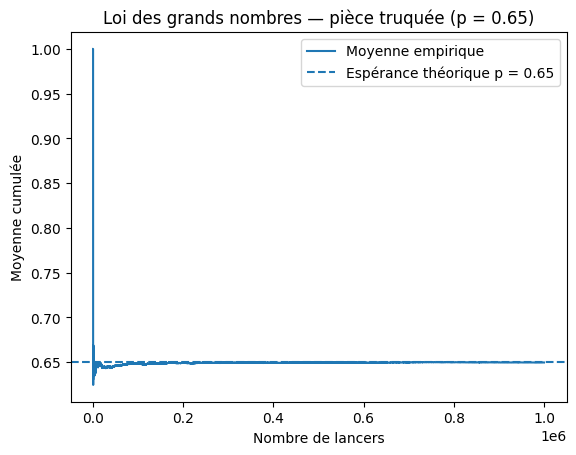

Proportion de piles obtenue (≈ E[X]) : 0.651


In [214]:
# Paramètres
p = 0.65
n = 1000000

# Simulation
list_of_X = coin_biased(n, p)
# Moyenne cumulée : loi des grands nombres
running_mean = np.cumsum(X) / np.arange(1, n + 1)

# Affichage
plt.plot(running_mean, label="Moyenne empirique")
plt.axhline(p, linestyle="--", label=f"Espérance théorique p = {p}")
plt.title(f"Loi des grands nombres — pièce truquée (p = {p})")
plt.xlabel("Nombre de lancers")
plt.ylabel("Moyenne cumulée")
plt.legend()
plt.show()
print(f"Proportion de piles obtenue (≈ E[X]) : {list_of_X.mean():.3f}")




## 4) Théorème central limite (CLT)
Pour des VA i.i.d. de moyenne `μ` et variance `σ²`, la moyenne d'un grand nombre d'échantillons est **approximativement normale** :
$$
\frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} \mathcal{N}(0,1)
$$

### L'idée de base
Imaginez que vous lancez un dé plusieurs fois. Le Théorème Central Limite nous dit quelque chose de magique : **peu importe la forme de vos données d'origine, si vous prenez la moyenne de beaucoup d'échantillons, cette moyenne suivra toujours une courbe en cloche (distribution normale)**.

### Décomposons la formule

**Chaque partie expliquée :**

1. **$\bar{X}_n$** = La moyenne de vos $n$ observations
   - Exemple : vous lancez 100 pièces, $\bar{X}_n$ est la proportion de "face"

2. **$\mu$** = La vraie moyenne théorique 
   - Pour une pièce équilibrée : $\mu = 0.5$ (50% de faces)

3. **$\sigma$** = L'écart-type (la dispersion) de vos données
   - Mesure combien vos données varient autour de la moyenne

4. **$n$** = Le nombre d'observations dans votre échantillon
   - Plus $n$ est grand, meilleure est l'approximation

5. **$\frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}}$** = La **standardisation**
   - On centre (en soustrayant $\mu$) : cela ramène la moyenne à 0
   - On divise par l'erreur standard ($\sigma/\sqrt{n}$) : cela ramène la variance à 1

6. **$\xrightarrow{d}$** = "converge en distribution vers"
   - Quand $n$ devient très grand, ça ressemble de plus en plus à...

7. **$\mathcal{N}(0,1)$** = La distribution normale standard
   - Moyenne = 0, Variance = 1
   - La fameuse courbe en cloche !

### Exemple concret avec des pièces

Supposons que vous lanciez une pièce :
- Chaque lancer donne 1 (face) ou 0 (pile)
- Moyenne théorique : $\mu = 0.5$
- Écart-type : $\sigma = 0.5$

**Si vous faites 100 lancers :**
- Vous obtenez par exemple 47 faces → $\bar{X}_n = 0.47$
- La formule calcule : $\frac{0.47 - 0.5}{0.5/\sqrt{100}} = \frac{-0.03}{0.05} = -0.6$

Ce nombre (-0.6) suit approximativement une distribution normale standard !

**Le message clé** : Plus vous avez d'observations ($n$ grand), plus la moyenne de votre échantillon sera proche d'une distribution normale, même si vos données d'origine ne le sont pas du tout !




### Notre pièce truqué 

Pour une variable de Bernoulli avec **p = 0.65** :
- **Moyenne théorique** : $\mu = p = 0.65$
- **Variance** : $\sigma^2 = p(1-p) = 0.65 \times 0.35 = 0.2275$
- **Écart-type** : $\sigma = \sqrt{0.2275} \approx 0.477$

### La formule appliquée à votre cas

$$\frac{\bar{X}_n - 0.65}{0.477/\sqrt{n}} \xrightarrow{d} \mathcal{N}(0,1)$$

### Exemple concret avec différentes tailles d'échantillons

#### **Petit échantillon (n = 10 lancers)**
- Vous lancez 10 fois, obtenez 7 faces → $\bar{X}_{10} = 0.7$
- Standardisation : $\frac{0.7 - 0.65}{0.477/\sqrt{10}} = \frac{0.05}{0.151} \approx 0.33$
- L'approximation normale est **médiocre** avec si peu de lancers

#### **Échantillon moyen (n = 100 lancers)**
- Vous lancez 100 fois, obtenez 62 faces → $\bar{X}_{100} = 0.62$
- Standardisation : $\frac{0.62 - 0.65}{0.477/\sqrt{100}} = \frac{-0.03}{0.0477} \approx -0.63$
- L'approximation normale devient **correcte**

#### **Grand échantillon (n = 1000 lancers)**
- Vous lancez 1000 fois, obtenez 643 faces → $\bar{X}_{1000} = 0.643$
- Standardisation : $\frac{0.643 - 0.65}{0.477/\sqrt{1000}} = \frac{-0.007}{0.0151} \approx -0.46$
- L'approximation normale est **excellente**

### Ce que vous allez observer

```
Avec p = 0.65, si vous répétez l'expérience de n lancers plusieurs fois :

n = 10 :  Les moyennes varient beaucoup
          Entre ~0.40 et ~0.90 typiquement
          Distribution encore un peu "bosselée"

n = 100 : Les moyennes se resserrent
          Entre ~0.55 et ~0.75 typiquement  
          Distribution presque normale

n = 1000: Les moyennes très concentrées
          Entre ~0.62 et ~0.68 typiquement
          Distribution parfaitement normale !
```

### Intervalles de confiance pratiques

Avec votre pièce truquée (p = 0.65), voici où se trouveront environ 95% de vos moyennes :

| Nombre de lancers | Intervalle à 95% |
|------------------|------------------|
| n = 10 | [0.35, 0.95] |
| n = 100 | [0.55, 0.75] |
| n = 1000 | [0.62, 0.68] |
| n = 10000 | [0.640, 0.660] |

### Le processus de standardisation expliqué

**Pourquoi standardiser ?**

1. **Sans standardisation** : Chaque taille d'échantillon donne une distribution différente
   - n = 100 : moyenne autour de 0.65, écart-type ≈ 0.048
   - n = 1000 : moyenne autour de 0.65, écart-type ≈ 0.015

2. **Avec standardisation** : Toutes convergent vers $\mathcal{N}(0,1)$
   - On soustrait 0.65 → centre à 0
   - On divise par $\sigma/\sqrt{n}$ → variance devient 1
   - **Résultat** : Peu importe n, on obtient la même courbe standard !


**L'intuition clé** : Même avec une pièce truquée, si vous prenez assez de lancers, la moyenne de vos résultats suivra toujours une belle courbe normale centrée sur la vraie probabilité (0.65) !

Nous allons :  
1) tirer plusieurs **paquets** de lancers Bernoulli(p),  
2) calculer les moyennes de paquets,  
3) les **standardiser**,  
4) comparer l'histogramme aux densités normales.


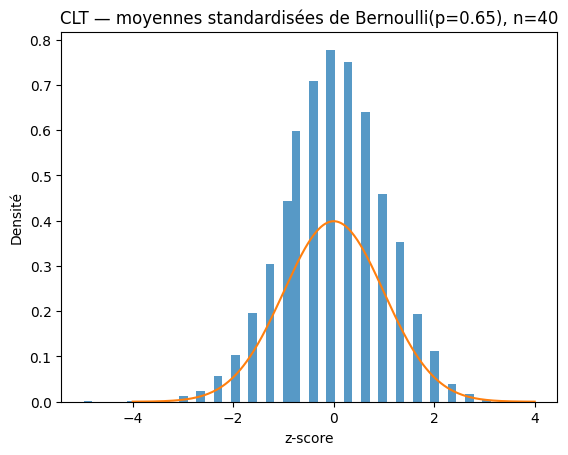

In [218]:

reset_rng(7)
p = 0.65
mu = p
sigma = math.sqrt(p*(1-p))

m = 10_000     # nombre de paquets
n = 40         # taille d'un paquet

# moyennes par paquet
means = coin_biased(m*n, p=p).reshape(m, n).mean(axis=1)
z = (means - mu) / (sigma/math.sqrt(n))

plt.figure()
plt.hist(z, bins=50, density=True, alpha=0.75)
x = np.linspace(-4, 4, 400)
plt.plot(x, stats.norm.pdf(x))  # densité N(0,1)
plt.title("CLT — moyennes standardisées de Bernoulli(p=%.2f), n=%d" % (p, n))
plt.xlabel("z-score")
plt.ylabel("Densité")
plt.show()



## 5) Lois fondamentales : uniforme, normale, exponentielle, binomiale
Nous illustrons des tirages simples et leurs caractéristiques.


In [ ]:

reset_rng(21)
N = 50_000

# Uniforme(0,1)
U = rng.random(N)  # déjà Uniforme(0,1) via random
print("Uniforme(0,1) — moyenne ~", U.mean(), "variance ~", U.var())

plt.figure()
plt.hist(U, bins=50, density=True, alpha=0.8)
plt.title("Uniforme(0,1) — histogramme")
plt.xlabel("x"); plt.ylabel("densité")
plt.show()

# Normale(mu, sigma)
mu, s = 0.0, 1.0
Z = rng.normal(mu, s, N)
print("Normale(0,1) — moyenne ~", Z.mean(), "variance ~", Z.var())

plt.figure()
plt.hist(Z, bins=60, density=True, alpha=0.8)
x = np.linspace(-4, 4, 400)
plt.plot(x, stats.norm.pdf(x, mu, s))
plt.title("Normale(0,1) — histogramme")
plt.xlabel("x"); plt.ylabel("densité")
plt.show()

# Exponentielle(lambda)
lmbda = 2.0
E = rng.exponential(1/lmbda, N) # paramètre = 1/lambda dans NumPy
print("Exponentielle(λ=2) — moyenne ~", E.mean(), "variance ~", E.var())

plt.figure()
plt.hist(E, bins=60, density=True, alpha=0.8)
x = np.linspace(0, 4, 400)
plt.plot(x, lmbda*np.exp(-lmbda*x))
plt.title("Exponentielle(λ=2) — histogramme")
plt.xlabel("x"); plt.ylabel("densité")
plt.show()

# Binomiale(n, p) : somme de Bernoulli(p)
n_trials, p_b = 10, 0.3
B = rng.binomial(n_trials, p_b, N)
print("Binomiale(n=10,p=0.3) — moyenne ~", B.mean(), "variance ~", B.var(), "(théorie: np, np(1-p))")

plt.figure()
plt.hist(B, bins=range(0, n_trials+2), density=True, align='left', rwidth=0.9)
k = np.arange(0, n_trials+1)
plt.plot(k, stats.binom.pmf(k, n_trials, p_b), marker='o', linestyle='-')
plt.title("Binomiale(n=10, p=0.3) — histogramme vs pmf")
plt.xlabel("k"); plt.ylabel("probabilité")
plt.show()



## 6) Covariance et (in)dépendance
La covariance mesure une relation linéaire entre deux VA.  
Exemple : `Y = X + bruit`, la covariance entre `X` et `Y` est positive.


In [ ]:

reset_rng(101)
N = 20_000
X = rng.normal(0, 1, N)
Y = X + rng.normal(0, 0.5, N)

cov = np.cov(X, Y, bias=True)[0,1]  # estimateur de covariance (bias=True -> /N)
corr = np.corrcoef(X, Y)[0,1]
print("Covariance(X,Y) ~", cov, " Corr(X,Y) ~", corr)



## 7) Exercices pratiques
1. **Calculer à la main** l'espérance et la variance d'une Bernoulli(p). Vérifiez avec une simulation.  
2. **Vérifier la LLN** pour différents `p` (0.2, 0.5, 0.8) et tailles d’échantillons.  
3. **CLT** : changez la taille de paquet `n` (5, 20, 100) et observez la normalité des z-scores.  
4. **Exponential vs Normal** : comparez leurs histogrammes et moments empiriques.  
5. **Binomiale** : changez `n_trials` et `p` et comparez histogramme et pmf théorique.

> Astuce : utilisez toujours des **gros échantillons** pour stabiliser les estimations.



## 📚 Ressources
- Bernard Bru — *Introduction à la statistique*  
- Chaîne YouTube — **StatQuest with Josh Starmer**  
- Documentation Python : `numpy.random`, `scipy.stats`, `matplotlib`

> Ces ressources complètent l'intuition et la pratique — l'objectif ici est de **voir** la théorie à l'œuvre.
